<a href="https://colab.research.google.com/github/inputJun/MachineLearning-Study/blob/main/201700846_%2C_%EA%B3%A0%EC%A4%80%ED%99%98%2C_%EA%B3%A0%EB%8F%84%EC%98%A8%EB%8F%84%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_%5B2022_1_%EB%93%9C%EB%A1%A0%EA%B3%BC%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
altitude = np.array(
    [-0.433155, 1.079574, 2.638519, 4.623501, 7.126587,
    10.685129, 13.399242, 14.621283, 16.544296, 18.743357,
    21.829630, 25.542978, 29.714117, 32.813224, 34.205818,
    34.623686, 34.706989, 33.525600]
     )
temperature = np.array(
    [23.561301, 23.510735, 23.493920, 23.484786, 23.419431,
    23.386666, 23.325946, 23.291131, 23.284900, 23.214066,
    23.192182, 23.189660, 23.156077, 23.085148, 23.081649,
    23.083885, 23.051354, 22.984942]
     )

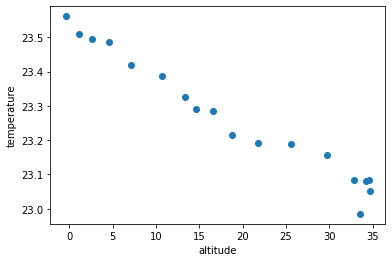

In [35]:
import matplotlib.pyplot as plt
plt.scatter(altitude, temperature)
plt.xlabel('altitude')
plt.ylabel('temperature')
plt.show()

In [36]:
pre_altitude = [60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

**선형 회귀**

In [37]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(altitude, temperature, random_state=13)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.coef_, lr.intercept_)

[-0.01427449] 23.531879123491255


**선형 회귀 분석을 사용했을 고도 60 ~ 150 미터까지에서의 온도 예측값**

In [39]:
pre_target = []
for i in pre_altitude :
  pre_target.extend(lr.predict([[i]]))

print(pre_target)

[22.675409498101743, 22.532664560536823, 22.389919622971906, 22.247174685406986, 22.10442974784207, 21.96168481027715, 21.818939872712228, 21.67619493514731, 21.53344999758239, 21.390705060017474]


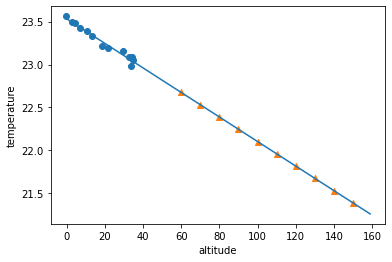

In [40]:
import matplotlib.pyplot as plt
point = np.arange(0, 160)
plt.scatter(train_input, train_target)
plt.scatter(pre_altitude, pre_target, marker='^')
plt.plot(point, lr.coef_*point + lr.intercept_)
plt.xlabel('altitude')
plt.ylabel('temperature')
plt.show()

**선형 회귀 분석 시 훈련/테스트 세트의 R^2 점수**

In [41]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9688025843609072
0.9617227262825865


**다항 회귀**

In [42]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [43]:
print(train_poly.shape, test_poly.shape)

(13, 2) (5, 2)


In [44]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.coef_, lr.intercept_)

[ 0.00012359 -0.01884006] 23.55411522343983


**다항 회귀 분석을 사용했을 고도 60 ~ 150 미터까지에서의 온도 예측값**

In [45]:
pre_target = []
for i in pre_altitude :
  pre_target.extend(lr.predict([[i ** 2, i]]))

print(pre_target)

[22.868639978275823, 22.84090794636961, 22.837894155117056, 22.85959860451815, 22.906021294572902, 22.977162225281308, 23.07302139664337, 23.193598808659083, 23.33889446132845, 23.50890835465147]


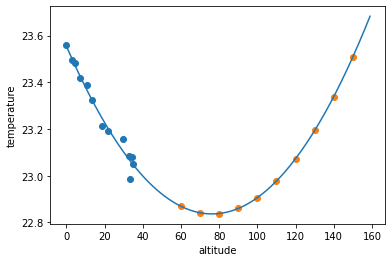

In [47]:
point = np.arange(0, 160)
plt.scatter(train_input, train_target)
plt.scatter(pre_altitude, pre_target)
plt.plot(point, 0.00012359*point**2 -0.01884006*point + lr.intercept_)
plt.xlabel('altitude')
plt.ylabel('temperature')
plt.show()

**다항 회귀 분석 시 훈련/테스트 세트의 R^2 점수**

In [48]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.974029957128589
0.9672654927525078


# **결론**

선형 회귀 분석과 다항 회귀 분석의 R^2 값을 비교했을 때 다항 회귀 분석의 R^2값이 더 높은 것을 확인할 수 있지만 연구 상으로 밝혀진 바에 의해 상공 10km 높이의 대류권 경계면 이전까지는 고도가 높아질 수록 온도가 낮아지기 때문에 **선형 회귀 분석으로 분석한 결과가 더 실제값에 가까운 값이라는 결론을 낼 수 있다.**